# Hypothesis Testing

This notebook is used for testing hypothesis based on the following:

- Selecting Top-n words, where n is a positive integer more than 5
- K-Means clustering, where K is a positive integer more than or equal to 100

The evaluation metric to be taken into consideration is **Precision** and the methods to be used are **avg_hybrid** and **cluster_freq**

In [1]:
# Load Excel File using Pandas
import pandas as pd

xls = pd.ExcelFile("C:/Users/MyPC/Desktop/Vegito/Hypothesis.xlsx")

In [3]:
# Verify the sheets(workbooks)

xls.sheet_names

['Hybrid', 'Clustering']

In [4]:
# Load the libraries (ONLY ONCE)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [5]:
# Function to standardize the given dataframe and return the standard dataframe

def standardizeDataFrame(df):
    
    # Table to store dictionaries
    format_table = []
    
    # Lower Case the columns' name
    df.columns = map(str.lower, df.columns)
    
    # Classifier Array
    clf_dict = {"Naive Bayes": "nb",
                "SVM": "svm",
                "Random Forest": "rf"}
    
    # Loop classifier by classifier
    # Then get the results along with the standard deviation
    for key, value in clf_dict.items():
        
        for i, method in enumerate(df['top-n']):
            
            format_table.append({'top-n': method,
                         'model': key,
                         'value': df[value][i]})
            
    
    # Overwrite the table
    df = pd.DataFrame(format_table)
    
    return df

In [15]:
# Function to create point plot for the given metric
def createPointPlot(df, legend_loc):
    
    # Recreate the title
    title = "Precision Scores"
    
    # Plot for Accuracy 
    plt.figure(figsize=(30,8))

    # Dataframe-related
    clf_list = df['model'].unique()
    top_n = df['top-n']

    # Matplotlib variables
    FONT_SIZE = 30
    PADDING = 40

    fig = sns.pointplot(x='top-n', y='value', hue='model', palette="muted",
                        data=df[df.model.map(lambda x: x in clf_list)])


    plt.rc('axes', labelsize=FONT_SIZE)
    plt.rc('axes', titlesize=FONT_SIZE)
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.ylim(ymin=0, ymax=1.0)
    plt.figtext(.5,.95,title, fontsize=FONT_SIZE, ha='center')
    plt.grid(True)

    sns.set_context("notebook", font_scale=2.0)
    sns.set_style('ticks')
    sns.despine()
    
    fig.set(ylabel="Score")
    fig.set_xticklabels(rotation=30, labels=top_n)
    fig.set(xlabel="Top-n Words")
    fig.axes.legend(loc=legend_loc, prop={'size': 20})

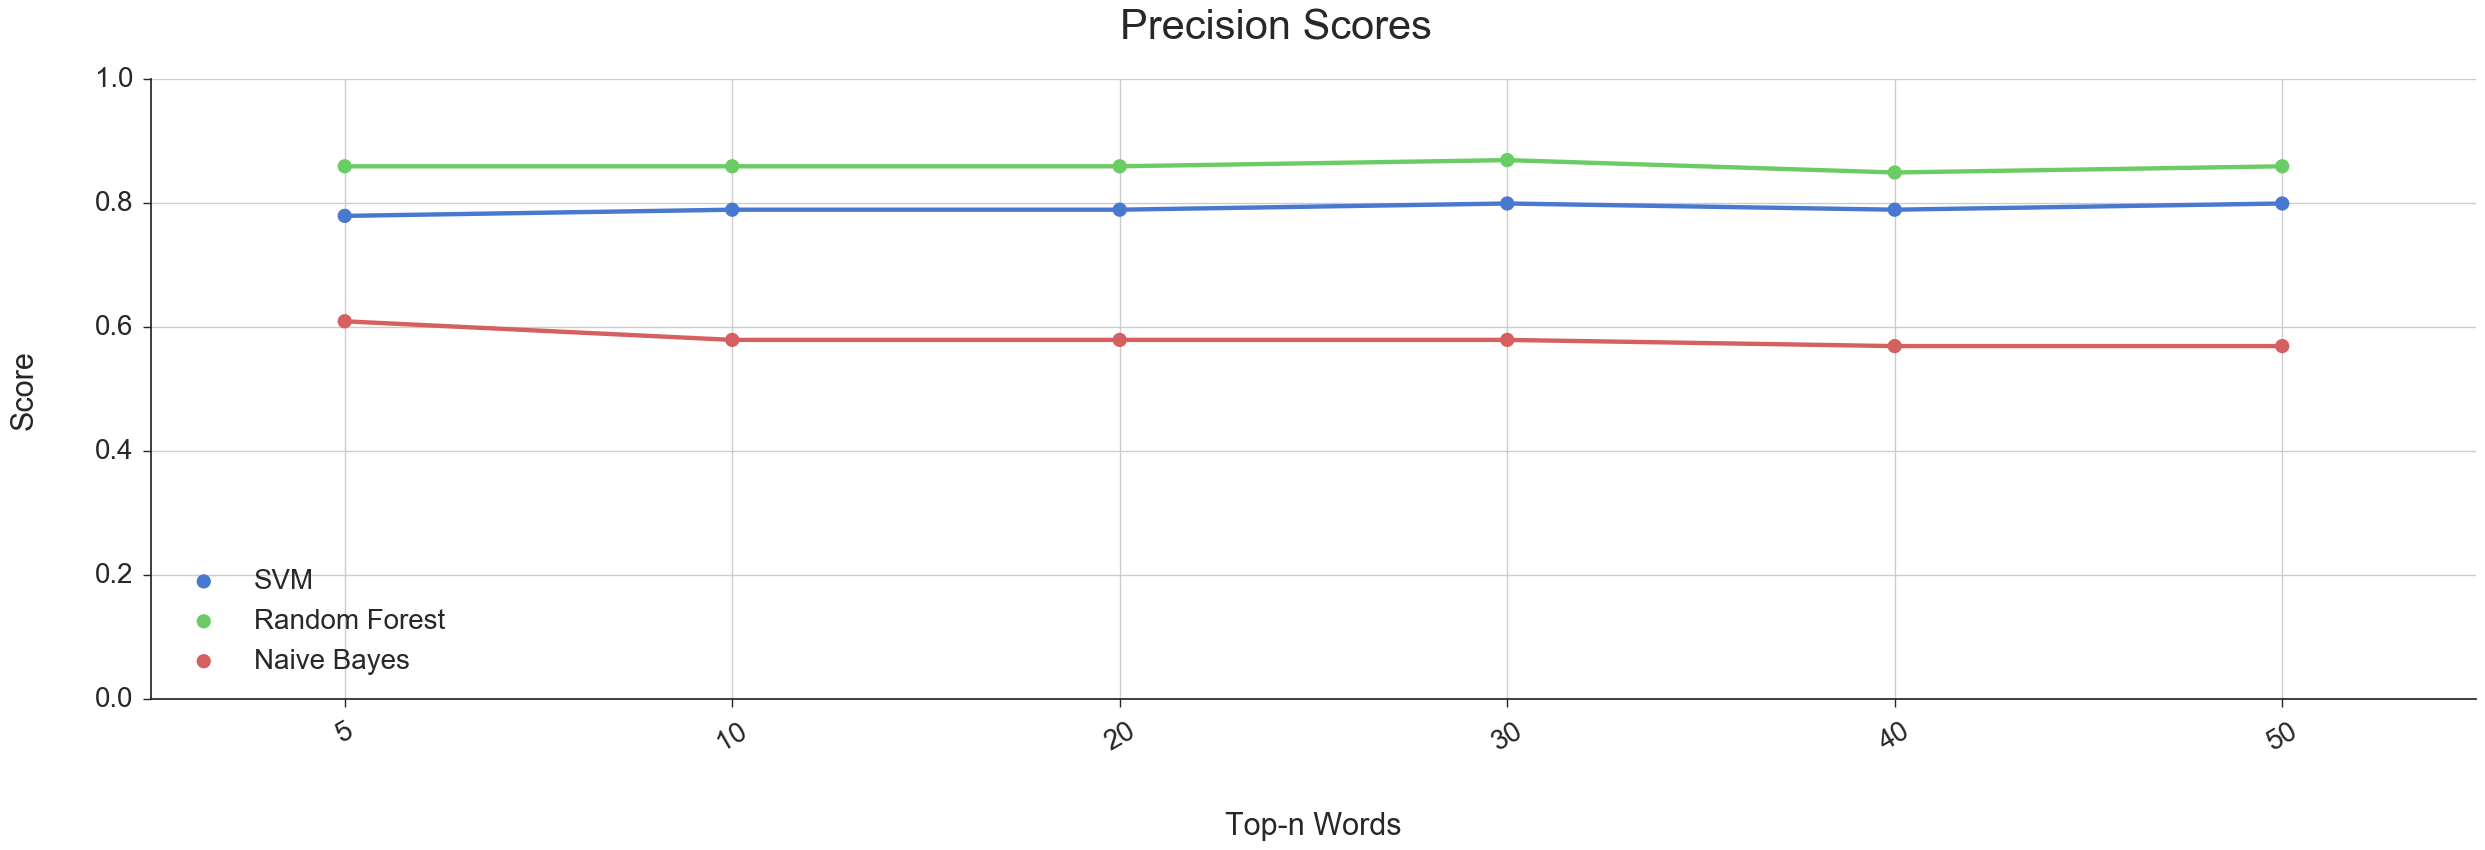

In [16]:
#Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Hybrid'))

# Create the point plot
createPointPlot(transformed_df, 'lower left')

# Show the plot and the results in table
plt.show()